In [1]:
import tensorflow as tf
keras = tf.keras
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
%run ../src/acc_df.py
Ac = Acc_data('../data/cleaned/coll_coord.csv')
acc = Ac.get_all_coll() #['']

### 1. Turn it into a time series of weeks

In [3]:
acc_04_18 = acc[(acc['year'] != 2019) & (acc['year'] != 2003 )]
acc_w = acc_04_18[['year','week','OBJECTID']].groupby(['year','week']).count()

In [4]:
week_numbers = acc_w.reset_index()
week_numbers.rename({'OBJECTID': 'acc_nr'}, axis=1, inplace=True)

In [5]:
# week_numbers.index.values

In [6]:
week_numbers.tail(2)

,year,week,acc_nr
784,2018,51,234
785,2018,52,150


In [7]:
acc_nr_bw = week_numbers.acc_nr.values #[:100]

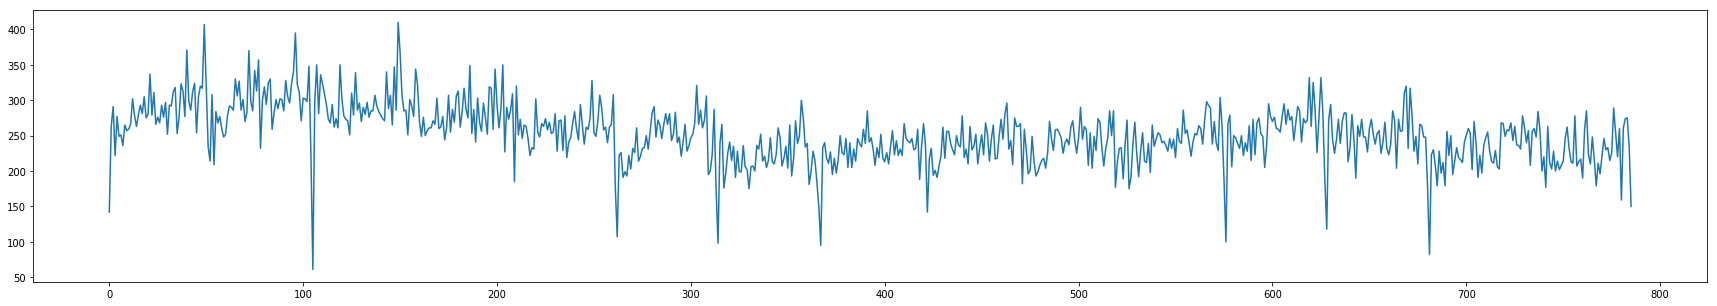

In [8]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(week_numbers.index.values, acc_nr_bw)

#### Windowize and split

In [9]:
def windowize_data(data, n_prev):
    n_predictions = len(data) - n_prev
    y = data[n_prev:]
    # this might be too clever
    indices = np.arange(n_prev) + np.arange(n_predictions)[:, None]
    x = data[indices, None]
    return x, y

In [10]:
# windowize_data(week_numbers.index.values,20)

In [11]:
def split_and_windowize(data, n_prev, fraction_test=0.3):
    n_predictions = len(data) - 2*n_prev
    
    n_test  = int(fraction_test * n_predictions)
    n_train = n_predictions - n_test   
    
    x_train, y_train = windowize_data(data[:n_train], n_prev)
    x_test, y_test = windowize_data(data[n_train:], n_prev)
    return x_train, x_test, y_train, y_test

In [12]:
n_prev = 100
x_train, x_test, y_train, y_test = split_and_windowize(acc_nr_bw,n_prev,fraction_test=0.1)

#### Model

In [13]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
              loss='mean_squared_error')

### Train

In [14]:
model.fit(x_train, y_train, batch_size=32, epochs=1000)

Train on 428 samples
Epoch 1/1000
428/428 [==============================] - 3s 8ms/sample - loss: 62662.3075
Epoch 2/1000
428/428 [==============================] - 1s 2ms/sample - loss: 60953.9773
Epoch 3/1000
428/428 [==============================] - 1s 2ms/sample - loss: 60322.1606
Epoch 4/1000
428/428 [==============================] - 1s 2ms/sample - loss: 59930.7786
Epoch 5/1000
428/428 [==============================] - 1s 2ms/sample - loss: 59627.5447
Epoch 6/1000
428/428 [==============================] - 1s 2ms/sample - loss: 59364.3843
Epoch 7/1000
428/428 [==============================] - 1s 2ms/sample - loss: 59120.6551
Epoch 8/1000
428/428 [==============================] - 1s 2ms/sample - loss: 58885.9698
Epoch 9/1000
428/428 [==============================] - 1s 2ms/sample - loss: 58656.8993
Epoch 10/1000
428/428 [==============================] - 1s 2ms/sample - loss: 58431.7001
Epoch 11/1000
428/428 [==============================] - 1s 2ms/sample - loss: 58209.416

In [15]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[249.74915],
       [249.74915],
       [249.74915],
       [249.74915],
       [249.74915]], dtype=float32)

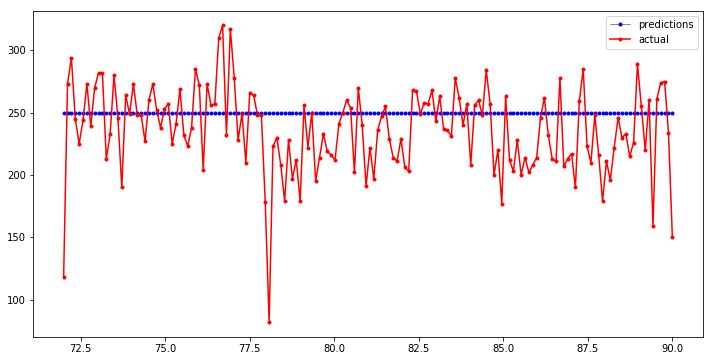

In [16]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()

In [20]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.LSTM(32, input_shape=(n_prev, 1), return_sequences=True))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=32, epochs=2000)

Train on 428 samples
Epoch 1/2000
428/428 [==============================] - 4s 9ms/sample - loss: 62636.5540
Epoch 2/2000
428/428 [==============================] - 1s 3ms/sample - loss: 61283.5388
Epoch 3/2000
428/428 [==============================] - 1s 3ms/sample - loss: 60643.5740
Epoch 4/2000
428/428 [==============================] - 1s 3ms/sample - loss: 60234.4917
Epoch 5/2000
428/428 [==============================] - 1s 3ms/sample - loss: 59921.5987
Epoch 6/2000
428/428 [==============================] - 1s 3ms/sample - loss: 59648.4347
Epoch 7/2000
428/428 [==============================] - 1s 3ms/sample - loss: 59398.3011
Epoch 8/2000
428/428 [==============================] - 1s 3ms/sample - loss: 59159.6897
Epoch 9/2000
428/428 [==============================] - 1s 3ms/sample - loss: 58929.4570
Epoch 10/2000
428/428 [==============================] - 1s 3ms/sample - loss: 58702.6633
Epoch 11/2000
428/428 [==============================] - 1s 3ms/sample - loss: 58478.590

In [21]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[239.23247],
       [234.27756],
       [224.4626 ],
       [203.10182],
       [179.94257]], dtype=float32)

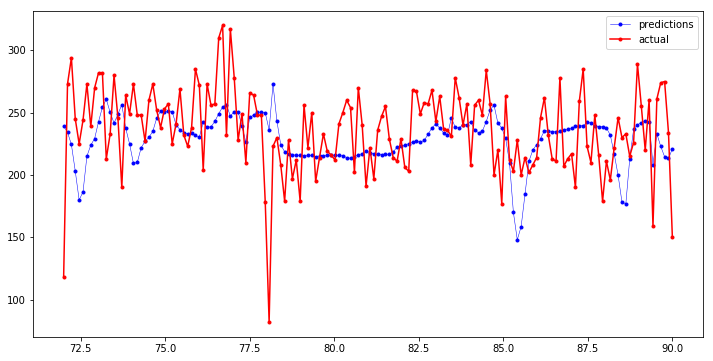

In [22]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()